In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 필요 라이브러리 설치 및 임포트

In [7]:
!pip install ultralytics

In [8]:
!pip install --upgrade ray

In [14]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.19 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5934.1/8062.4 GB disk)


In [15]:
from ultralytics import YOLO

# 모델 학습 준비

In [16]:
model = YOLO("yolo11n.pt")

In [17]:
!cp -r "/kaggle/input/yolo11n-orchard/train" "/kaggle/working/train"

In [18]:
!cp -r "/kaggle/input/yolo11n-orchard/valid" "/kaggle/working/val"

In [19]:
data = """
names:
  - apple
  - apple_tree
  - carrier
  - handcart
  - ladder
  - orchard_box
  - other
  - person
  - sprayer
  - truck
  - unpaved
  - warehouse
nc: 12
path: /kaggle/working/
train: train/images
val: val/images
"""

file_path = "/kaggle/working/dataset.yaml"

with open(file_path, "w") as file:
    file.write(data)

print("ready")

ready


# 커스텀 데이터로 yolo11n 모델학습

In [20]:
results = model.train(data='/kaggle/working/dataset.yaml', epochs=100, imgsz=640, model="yolo11n.pt",batch=16)

Ultralytics 8.3.19 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 39.1MB/s]
2024-10-22 02:53:11,805	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-22 02:53:12,330	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /kaggle/working/train/labels... 3018 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3018/3018 [00:03<00:00, 827.48it/s] 


train: New cache created: /kaggle/working/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1267, len(boxes) = 13487. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/working/val/labels... 863 images, 0 backgrounds, 0 corrupt: 100%|██████████| 863/863 [00:01<00:00, 660.38it/s] 


val: New cache created: /kaggle/working/val/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 330, len(boxes) = 3892. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.65G      1.079      2.477      1.089         78        640: 100%|██████████| 189/189 [00:43<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.06it/s]

                   all        863       3892      0.832      0.704       0.83      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.72G     0.9797      1.184      1.007         63        640: 100%|██████████| 189/189 [00:41<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.14it/s]


                   all        863       3892      0.903      0.859      0.863      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.67G     0.9472      1.042     0.9955         53        640: 100%|██████████| 189/189 [00:40<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.23it/s]


                   all        863       3892      0.946      0.874      0.913      0.796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.65G     0.9315     0.9418     0.9862         41        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.34it/s]


                   all        863       3892      0.907       0.86      0.962       0.84

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.68G     0.8898      0.829     0.9772         68        640: 100%|██████████| 189/189 [00:40<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.30it/s]


                   all        863       3892      0.893      0.956      0.956      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.65G     0.8853     0.7884     0.9699         59        640: 100%|██████████| 189/189 [00:40<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.19it/s]


                   all        863       3892      0.901      0.953      0.956      0.862

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.67G      0.858     0.7383     0.9626         66        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.46it/s]


                   all        863       3892       0.96      0.956      0.971      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.65G     0.8607     0.7017     0.9597         88        640: 100%|██████████| 189/189 [00:40<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.45it/s]


                   all        863       3892      0.954      0.937      0.964       0.86

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.65G      0.831     0.6664     0.9571         88        640: 100%|██████████| 189/189 [00:40<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.40it/s]


                   all        863       3892      0.948      0.965      0.974      0.894

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.68G     0.8358     0.6484     0.9508         90        640: 100%|██████████| 189/189 [00:40<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.40it/s]


                   all        863       3892      0.943      0.975      0.976      0.894

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.67G     0.7981     0.6165     0.9482         48        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.42it/s]


                   all        863       3892      0.941      0.949      0.971      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.64G     0.8209     0.6172     0.9421         90        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.37it/s]


                   all        863       3892      0.964      0.935      0.977      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.71G     0.7998     0.6048     0.9397         81        640: 100%|██████████| 189/189 [00:40<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.43it/s]

                   all        863       3892      0.935      0.968      0.976      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.67G     0.7928     0.5893     0.9422         58        640: 100%|██████████| 189/189 [00:40<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.41it/s]


                   all        863       3892      0.957      0.965      0.979      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.66G     0.7882      0.578     0.9354         35        640: 100%|██████████| 189/189 [00:40<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.38it/s]


                   all        863       3892      0.958      0.964      0.977      0.919

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.68G     0.7805     0.5759     0.9373         51        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.46it/s]


                   all        863       3892      0.957      0.963      0.977      0.913

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.64G     0.7845       0.57     0.9342         49        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.48it/s]


                   all        863       3892       0.97      0.944      0.975      0.904

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.71G     0.7625     0.5483     0.9309         46        640: 100%|██████████| 189/189 [00:40<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.46it/s]


                   all        863       3892       0.94       0.95      0.979      0.909

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.65G     0.7723     0.5544     0.9323         91        640: 100%|██████████| 189/189 [00:40<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.44it/s]


                   all        863       3892      0.947      0.966      0.968      0.896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.68G     0.7513     0.5388     0.9314         43        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.44it/s]


                   all        863       3892      0.965      0.969      0.979      0.919

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.79G     0.7647     0.5389     0.9339         66        640: 100%|██████████| 189/189 [00:40<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.47it/s]


                   all        863       3892      0.963      0.968      0.979      0.912

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.72G     0.7379     0.5281     0.9245         60        640: 100%|██████████| 189/189 [00:40<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.35it/s]


                   all        863       3892      0.954      0.969      0.979       0.91

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.67G      0.759     0.5336     0.9259         61        640: 100%|██████████| 189/189 [00:40<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.39it/s]


                   all        863       3892      0.965      0.972       0.98      0.909

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.72G     0.7441     0.5232     0.9272         65        640: 100%|██████████| 189/189 [00:40<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.09it/s]


                   all        863       3892      0.952      0.957      0.976      0.921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.66G     0.7518     0.5216     0.9231         37        640: 100%|██████████| 189/189 [00:40<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.48it/s]


                   all        863       3892      0.958      0.965      0.981      0.923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.71G     0.7374     0.5066     0.9214         87        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.48it/s]


                   all        863       3892      0.964      0.973      0.981      0.928

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.65G     0.7219     0.5007     0.9189         31        640: 100%|██████████| 189/189 [00:40<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.48it/s]


                   all        863       3892      0.932      0.962      0.968      0.909

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.66G     0.7467     0.5192     0.9206         75        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.53it/s]


                   all        863       3892      0.959       0.97      0.981       0.92

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.71G     0.7193     0.4931      0.917         61        640: 100%|██████████| 189/189 [00:40<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.49it/s]

                   all        863       3892      0.968      0.969      0.982      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.67G     0.7218     0.4953     0.9206         92        640: 100%|██████████| 189/189 [00:40<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.46it/s]


                   all        863       3892      0.931      0.972      0.982      0.923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.64G     0.7306     0.4995     0.9175         53        640: 100%|██████████| 189/189 [00:40<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.35it/s]


                   all        863       3892      0.967      0.976      0.982      0.931

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.66G     0.7117      0.486     0.9169         50        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.45it/s]


                   all        863       3892      0.963      0.973      0.982      0.928

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.66G     0.7126     0.4812     0.9132        113        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.24it/s]


                   all        863       3892      0.967      0.973      0.983      0.925

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.67G     0.7175     0.4842     0.9131         77        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.48it/s]


                   all        863       3892      0.968      0.975      0.982      0.932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.64G     0.7001     0.4725     0.9156        132        640: 100%|██████████| 189/189 [00:40<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.44it/s]


                   all        863       3892      0.967      0.976      0.983      0.926

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       2.7G     0.7096     0.4793     0.9117         57        640: 100%|██████████| 189/189 [00:40<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.52it/s]


                   all        863       3892      0.969      0.973      0.983      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.65G     0.7039     0.4749     0.9112        105        640: 100%|██████████| 189/189 [00:40<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.55it/s]


                   all        863       3892      0.969      0.975      0.983      0.931

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.68G     0.6983      0.462       0.91         79        640: 100%|██████████| 189/189 [00:40<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.43it/s]


                   all        863       3892      0.971      0.972      0.983      0.926

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.68G      0.699     0.4651     0.9078         79        640: 100%|██████████| 189/189 [00:40<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.56it/s]


                   all        863       3892      0.949       0.97      0.983      0.933

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.68G     0.7143     0.4753     0.9107         76        640: 100%|██████████| 189/189 [00:40<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.18it/s]


                   all        863       3892      0.966      0.964      0.982      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.66G     0.7007     0.4702       0.91         44        640: 100%|██████████| 189/189 [00:40<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.49it/s]


                   all        863       3892      0.972      0.974      0.984      0.931

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.66G     0.6838     0.4495      0.905         82        640: 100%|██████████| 189/189 [00:40<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.34it/s]

                   all        863       3892      0.972      0.973      0.984       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.67G      0.679     0.4482     0.9071         82        640: 100%|██████████| 189/189 [00:40<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.49it/s]


                   all        863       3892      0.972      0.974      0.984      0.935

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.67G     0.6826      0.451     0.9061         65        640: 100%|██████████| 189/189 [00:40<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.58it/s]


                   all        863       3892       0.96      0.973      0.984      0.929

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.64G     0.6776     0.4441     0.9045         79        640: 100%|██████████| 189/189 [00:40<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.57it/s]


                   all        863       3892      0.969      0.974      0.984      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.71G     0.6757     0.4473     0.9037         86        640: 100%|██████████| 189/189 [00:40<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.40it/s]


                   all        863       3892      0.974      0.975      0.984      0.922

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.66G       0.68     0.4461     0.9016         42        640: 100%|██████████| 189/189 [00:40<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.37it/s]


                   all        863       3892      0.976      0.971      0.984      0.929

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.64G     0.6618     0.4369     0.9029         97        640: 100%|██████████| 189/189 [00:40<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.50it/s]


                   all        863       3892      0.972      0.973      0.984      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.71G     0.6806     0.4424     0.9004         55        640: 100%|██████████| 189/189 [00:40<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.30it/s]


                   all        863       3892       0.97      0.973      0.984      0.932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.64G     0.6606     0.4306     0.9014         46        640: 100%|██████████| 189/189 [00:40<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.57it/s]


                   all        863       3892      0.972      0.976      0.984      0.937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.65G     0.6839      0.441     0.9031         50        640: 100%|██████████| 189/189 [00:40<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.46it/s]


                   all        863       3892      0.973      0.974      0.984      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.69G     0.6687     0.4348     0.9029         63        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.43it/s]


                   all        863       3892      0.972      0.974      0.984      0.932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.69G     0.6537     0.4293     0.8998         52        640: 100%|██████████| 189/189 [00:40<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.44it/s]


                   all        863       3892      0.974      0.976      0.985      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.79G     0.6759     0.4386     0.9008         58        640: 100%|██████████| 189/189 [00:40<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.49it/s]


                   all        863       3892      0.958      0.976      0.985      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.67G     0.6631     0.4351     0.9008         63        640: 100%|██████████| 189/189 [00:40<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.52it/s]


                   all        863       3892      0.974      0.977      0.985      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.71G     0.6484     0.4242      0.897         62        640: 100%|██████████| 189/189 [00:40<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.28it/s]

                   all        863       3892      0.971      0.974      0.983      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.67G     0.6514       0.42     0.8956         55        640: 100%|██████████| 189/189 [00:40<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.57it/s]


                   all        863       3892      0.972      0.974      0.985      0.938

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.65G     0.6551     0.4249     0.8975         53        640: 100%|██████████| 189/189 [00:40<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.52it/s]


                   all        863       3892      0.972      0.975      0.985      0.944

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.66G     0.6439     0.4211     0.8998         50        640: 100%|██████████| 189/189 [00:40<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.44it/s]

                   all        863       3892      0.971      0.974      0.985      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.67G     0.6535     0.4208     0.8956         53        640: 100%|██████████| 189/189 [00:40<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.44it/s]


                   all        863       3892      0.971      0.976      0.985      0.939

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.64G     0.6499     0.4202     0.8973         91        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.51it/s]


                   all        863       3892      0.972      0.978      0.985      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.68G     0.6515     0.4146      0.897         44        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.50it/s]


                   all        863       3892      0.971      0.975      0.985      0.943

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.66G     0.6477     0.4195     0.8961        118        640: 100%|██████████| 189/189 [00:40<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.28it/s]


                   all        863       3892      0.972      0.976      0.985      0.943

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.65G     0.6516     0.4143     0.8982         55        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.53it/s]


                   all        863       3892      0.972      0.975      0.985      0.944

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       2.7G      0.654     0.4152     0.8911         49        640: 100%|██████████| 189/189 [00:40<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.36it/s]

                   all        863       3892      0.975      0.974      0.986      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.65G     0.6297     0.4038     0.8913         73        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.50it/s]


                   all        863       3892       0.97      0.978      0.986      0.945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.68G     0.6259     0.3978     0.8925         65        640: 100%|██████████| 189/189 [00:41<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.34it/s]


                   all        863       3892      0.972      0.978      0.986      0.944

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.72G     0.6358     0.4027     0.8908         60        640: 100%|██████████| 189/189 [00:40<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.40it/s]


                   all        863       3892      0.972      0.977      0.985      0.942

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       2.7G     0.6415       0.41     0.8907         80        640: 100%|██████████| 189/189 [00:40<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.40it/s]


                   all        863       3892      0.973      0.976      0.986      0.935

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.68G     0.6297     0.3982     0.8898         53        640: 100%|██████████| 189/189 [00:40<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.43it/s]


                   all        863       3892      0.972      0.978      0.986      0.945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.65G     0.6361     0.4041     0.8917         94        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.45it/s]


                   all        863       3892      0.974      0.978      0.986      0.943

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.71G     0.6257     0.3983     0.8915         64        640: 100%|██████████| 189/189 [00:40<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.33it/s]


                   all        863       3892      0.976      0.976      0.987      0.945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.8G     0.6257     0.3944     0.8901         30        640: 100%|██████████| 189/189 [00:40<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.45it/s]


                   all        863       3892      0.972      0.979      0.986      0.946

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       2.7G     0.6392     0.4048     0.8911         54        640: 100%|██████████| 189/189 [00:40<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.39it/s]


                   all        863       3892      0.975      0.978      0.986      0.942

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.66G     0.6366     0.4029     0.8933         43        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.39it/s]


                   all        863       3892      0.973      0.977      0.986      0.945

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.64G     0.6211     0.3913     0.8904         62        640: 100%|██████████| 189/189 [00:40<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.43it/s]


                   all        863       3892      0.976      0.977      0.986      0.947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.64G     0.6361      0.399     0.8886         80        640: 100%|██████████| 189/189 [00:40<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.42it/s]

                   all        863       3892      0.972      0.978      0.987      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.65G     0.6102     0.3824     0.8878         50        640: 100%|██████████| 189/189 [00:40<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.37it/s]


                   all        863       3892      0.971      0.979      0.987      0.946

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.67G     0.6254     0.3897      0.887         55        640: 100%|██████████| 189/189 [00:40<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.42it/s]


                   all        863       3892      0.972      0.979      0.987      0.947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.64G      0.614     0.3841      0.888         61        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.43it/s]


                   all        863       3892      0.974      0.978      0.987      0.948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.63G     0.5849     0.3748     0.8826         93        640: 100%|██████████| 189/189 [00:40<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.25it/s]


                   all        863       3892      0.974      0.979      0.987      0.947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.64G     0.6039     0.3812     0.8855         46        640: 100%|██████████| 189/189 [00:40<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.35it/s]

                   all        863       3892      0.972      0.978      0.987      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.68G     0.6007     0.3761     0.8827         42        640: 100%|██████████| 189/189 [00:40<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.27it/s]

                   all        863       3892      0.975      0.979      0.987      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.66G      0.601     0.3788      0.882         35        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.57it/s]


                   all        863       3892      0.973      0.979      0.987      0.948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.63G     0.6005     0.3721     0.8781        103        640: 100%|██████████| 189/189 [00:40<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.51it/s]


                   all        863       3892      0.975       0.98      0.987      0.947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.71G     0.5968     0.3741     0.8846         78        640: 100%|██████████| 189/189 [00:40<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.49it/s]


                   all        863       3892      0.975       0.98      0.987      0.946

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.71G      0.587     0.3666     0.8855         70        640: 100%|██████████| 189/189 [00:40<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.47it/s]


                   all        863       3892      0.974      0.978      0.987      0.949

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.63G     0.6092     0.3771     0.8827         59        640: 100%|██████████| 189/189 [00:40<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.54it/s]


                   all        863       3892      0.975      0.978      0.987      0.947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.65G     0.6086     0.3787     0.8821         36        640: 100%|██████████| 189/189 [00:40<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.58it/s]

                   all        863       3892      0.972       0.98      0.987      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.68G      0.605     0.3753     0.8818         75        640: 100%|██████████| 189/189 [00:40<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.28it/s]


                   all        863       3892      0.972      0.981      0.987      0.948
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.71G     0.6455     0.3884     0.8622         16        640: 100%|██████████| 189/189 [00:40<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.53it/s]


                   all        863       3892      0.972       0.98      0.987      0.947

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.64G     0.6268      0.376       0.86         24        640: 100%|██████████| 189/189 [00:39<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.44it/s]


                   all        863       3892      0.972       0.98      0.987      0.948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       2.7G      0.629     0.3762     0.8589         23        640: 100%|██████████| 189/189 [00:40<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.44it/s]


                   all        863       3892      0.974      0.979      0.987      0.948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.65G     0.6232     0.3722     0.8535         43        640: 100%|██████████| 189/189 [00:40<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.48it/s]


                   all        863       3892      0.973       0.98      0.987      0.948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.63G     0.6174     0.3702     0.8536         44        640: 100%|██████████| 189/189 [00:40<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.58it/s]

                   all        863       3892      0.975      0.979      0.987      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.66G     0.6191     0.3654      0.852         55        640: 100%|██████████| 189/189 [00:40<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.64it/s]

                   all        863       3892      0.973      0.979      0.987      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.64G     0.6168     0.3638      0.854         42        640: 100%|██████████| 189/189 [00:40<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.30it/s]


                   all        863       3892      0.979      0.982      0.987      0.948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.68G     0.6186     0.3635     0.8557         31        640: 100%|██████████| 189/189 [00:39<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.47it/s]


                   all        863       3892      0.979      0.983      0.987      0.948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.66G     0.6183     0.3625     0.8529         36        640: 100%|██████████| 189/189 [00:40<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  5.38it/s]


                   all        863       3892       0.98      0.982      0.987      0.949

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.64G     0.6199     0.3641     0.8581         29        640: 100%|██████████| 189/189 [00:40<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.46it/s]


                   all        863       3892      0.973       0.98      0.987      0.949

100 epochs completed in 1.291 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.19 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,584,492 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.29it/s]


                   all        863       3892       0.98      0.982      0.987      0.949
                 apple        205       2630      0.879      0.797      0.904      0.537
            apple_tree        160        166      0.967      0.988      0.994       0.99
               carrier         30         30      0.977          1      0.995      0.991
              handcart         26         26      0.979          1      0.995      0.995
                ladder        176        176      0.997          1      0.995       0.98
           orchard_box        174        174      0.992          1      0.995      0.976
                 other          4          4          1          1      0.995      0.995
                person        368        368      0.994          1      0.994      0.953
               sprayer         38         38      0.986          1      0.995      0.995
                 truck         64         64          1      0.995      0.995      0.993
               unpave

lr/pg0,▆████▇▇▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▁
lr/pg1,████▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▁▁▁▁▁
lr/pg2,▃████▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁
metrics/mAP50(B),▁▆▄▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇█████████████████
metrics/mAP50-95(B),▁▂▄▂▃▅▆▅▅▆▆▆▇▅▆▆▇▇▇▇▇▆▇▇▇▇████▇█████████
metrics/precision(B),▅▁▇▆▆▅▅▇▆▇▆▇▇▆▇▇▇▇█▆▇▇▇▇██▇███▇██▇█▇████
metrics/recall(B),▁▂▁▇▅▆▅▇▇▇▇▇▇▇▇█████▇▇██████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▆▅▅▄▄▄▃▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▂▂▁▁▁


# 시각화 하기 위한 디렉토리 정리

In [21]:
!zip -r "/kaggle/working/train" "/kaggle/working/runs" "/kaggle/working/val" "/kaggle/working/dataset.yaml" "/kaggle/working/yolo11n.pt" "/kaggle/working/yolo11x.pt"

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


	zip warning: name not matched: /kaggle/working/yolo11x.pt
  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/train/ (stored 0%)
  adding: kaggle/working/runs/detect/train/train_batch17012.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/train/labels.jpg (deflated 27%)
  adding: kaggle/working/runs/detect/train/events.out.tfevents.1729565605.9fe21e86258f.30.0 (deflated 89%)
  adding: kaggle/working/runs/detect/train/PR_curve.png (deflated 14%)
  adding: kaggle/working/runs/detect/train/train_batch1.jpg (deflated 1%)
  adding: kaggle/working/runs/detect/train/P_curve.png (deflated 14%)
  adding: kaggle/working/runs/detect/train/val_batch2_pred.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/train/results.png (deflated 10%)
  adding: kaggle/working/runs/detect/train/args.yaml (deflated 53%)
  adding: kaggle/working/runs/detect/train/val_batch0_labels.jpg (deflated 6%)
  adding: kaggle/working/runs

In [22]:
!rm out.zip full.zip

rm: cannot remove 'out.zip': No such file or directory
rm: cannot remove 'full.zip': No such file or directory


In [23]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [24]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [25]:
download_file('/kaggle/working/full.zip', 'out')

Unable to run zip command!



# 객체탐지 및 시각화 (test 이미지로 예측)

In [32]:
from ultralytics import YOLO
import PIL

custom = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')  # load a custom model

result = custom(save=True, conf=0.5, source="/kaggle/input/yolo11n-orchard/test/images/train-3598-_jpg.rf.af0a67e4030fc3d1192d09b861c8390e.jpg")


image 1/1 /kaggle/input/yolo11n-orchard/test/images/train-3598-_jpg.rf.af0a67e4030fc3d1192d09b861c8390e.jpg: 640x640 26 apples, 9.7ms
Speed: 2.3ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


### 사람, 과일박스

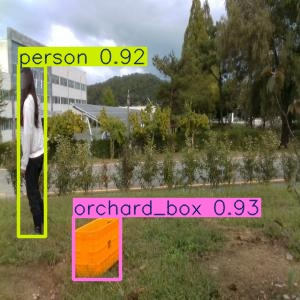

In [28]:
from PIL import Image
from IPython.display import display

image = Image.open("/kaggle/working/runs/detect/predict/train-1091-_jpg.rf.45fd8197fd06c424a1268dfc06e3f39c.jpg")

desired_size = (700, 600)

image.thumbnail(desired_size)

display(image)

### 사람, 사다리

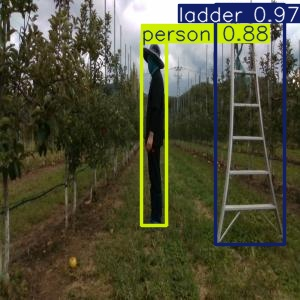

In [31]:
from PIL import Image
from IPython.display import display

image2 = Image.open("/kaggle/working/runs/detect/predict2/train-1296-_jpg.rf.e1aeb6f8defdf7dd18dd54fdfde3b945.jpg")

desired_size = (700, 600)

image2.thumbnail(desired_size)

display(image2)

### 사과

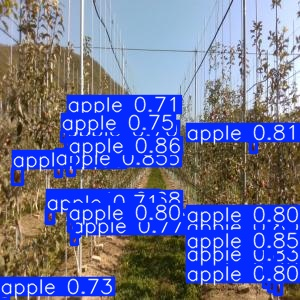

In [33]:
from PIL import Image
from IPython.display import display

image3 = Image.open("/kaggle/working/runs/detect/predict3/train-3598-_jpg.rf.af0a67e4030fc3d1192d09b861c8390e.jpg")

desired_size = (700, 600)

image3.thumbnail(desired_size)

display(image3)

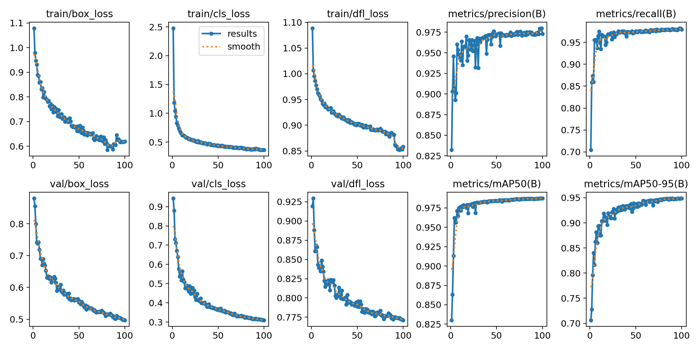

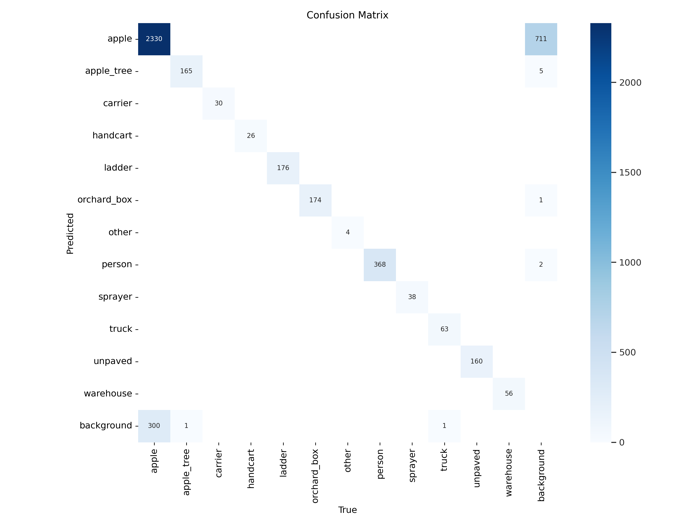

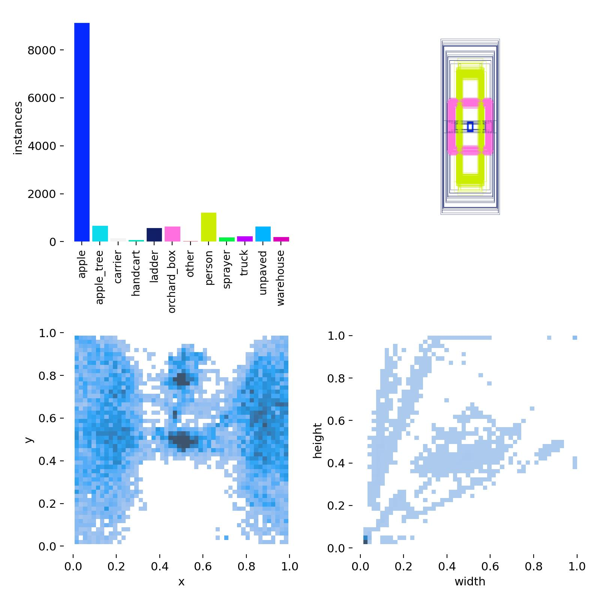

In [29]:
from PIL import Image
from IPython.display import display

def display_images(image_paths, desired_size=(700, 600)):
    for path in image_paths:
        image = Image.open(path)
        image.thumbnail(desired_size)
        display(image)

image_paths = ["/kaggle/working/runs/detect/train/results.png",
               "/kaggle/working/runs/detect/train/confusion_matrix.png",
               "/kaggle/working/runs/detect/train/labels.jpg"]

display_images(image_paths)